In [10]:
# import necessary packages
import pandas as pd
import numpy as np

# import data
recipes = pd.read_csv('recipe_site_traffic_2212.csv')

# inspect
recipes.head()

recipe  calories  carbohydrate  sugar  protein   category servings  \
0       1       NaN           NaN    NaN      NaN       Pork        6   
1       2     35.48         38.56   0.66     0.92     Potato        4   
2       3    914.28         42.68   3.09     2.88  Breakfast        1   
3       4     97.03         30.56  38.63     0.02  Beverages        4   
4       5     27.05          1.85   0.80     0.53  Beverages        4   

  high_traffic  
0         High  
1         High  
2          NaN  
3         High  
4          NaN

In [11]:
# DATA VALIDATION

# remove string from servings column
recipes['servings'] = recipes['servings'].str.replace(' as a snack','')

# replace nulls with 0s in high_traffic column
recipes['high_traffic'] = recipes['high_traffic'].fillna(0)

# replace values in high_traffic column
recipes['high_traffic'] = recipes['high_traffic'].replace('High',1)

# drop nulls in calories, carbohydrate, sugar, and protein columns
recipes = recipes.dropna(subset = ['calories', 'carbohydrate', 'sugar', 'protein'])

# change column data types
recipes['category'] = recipes['category'].astype('category')
recipes['servings'] = pd.to_numeric(recipes['servings'])
recipes['high_traffic'] = recipes['high_traffic'].astype('int')

# add some columns normalized by servings
recipes['cal_norm'] = recipes['calories']/recipes['servings']
recipes['carb_norm'] = recipes['carbohydrate']/recipes['servings']
recipes['sugar_norm'] = recipes['sugar']/recipes['servings']
recipes['prot_norm'] = recipes['protein']/recipes['servings']

display(recipes.head())
display(recipes.describe())

recipe  calories  carbohydrate  sugar  protein       category  servings  \
1       2     35.48         38.56   0.66     0.92         Potato         4   
2       3    914.28         42.68   3.09     2.88      Breakfast         1   
3       4     97.03         30.56  38.63     0.02      Beverages         4   
4       5     27.05          1.85   0.80     0.53      Beverages         4   
5       6    691.15          3.46   1.65    53.93  One Dish Meal         2   

   high_traffic  cal_norm  carb_norm  sugar_norm  prot_norm  
1             1    8.8700     9.6400      0.1650     0.2300  
2             0  914.2800    42.6800      3.0900     2.8800  
3             1   24.2575     7.6400      9.6575     0.0050  
4             0    6.7625     0.4625      0.2000     0.1325  
5             1  345.5750     1.7300      0.8250    26.9650

recipe     calories  carbohydrate       sugar     protein  \
count  895.000000   895.000000    895.000000  895.000000  895.000000   
mean   473.652514   435.939196     35.069676    9.046547   24.149296   
std    272.763283   453.020997     43.949032   14.679176   36.369739   
min      2.000000     0.140000      0.030000    0.010000    0.000000   
25%    237.500000   110.430000      8.375000    1.690000    3.195000   
50%    475.000000   288.550000     21.480000    4.550000   10.800000   
75%    708.500000   597.650000     44.965000    9.800000   30.200000   
max    947.000000  3633.160000    530.420000  148.750000  363.360000   

         servings  high_traffic     cal_norm   carb_norm  sugar_norm  \
count  895.000000    895.000000   895.000000  895.000000  895.000000   
mean     3.458101      0.597765   191.214301   14.904328    3.828301   
std      1.735979      0.490623   290.149519   24.894608    8.737914   
min      1.000000      0.000000     0.070000    0.007500    0.001667   
25%      2.000000      0.000000    33.693750    2.477500    0.541667   
50%      4.000000      1.000000    93.571667    6.940000    1.400000   
75%      4.000000      1.000000   225.240000   16.395000    3.768750   
max      6.000000      1.000000  2332.320000  383.060000  148.750000   

        prot_norm  
count  895.000000  
mean    10.451841  
std     18.917186  
min      0.000000  
25%      0.980417  
50%      3.340000  
75%     11.118750  
max    182.630000

/Users/arian/anaconda3/envs/geo_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/arian/anaconda3/envs/geo_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/arian/anaconda3/envs/geo_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/arian/anaconda3/envs/geo_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a futu

ValueError: autodetected range of [-inf, 2.2615721191144775] is not finite

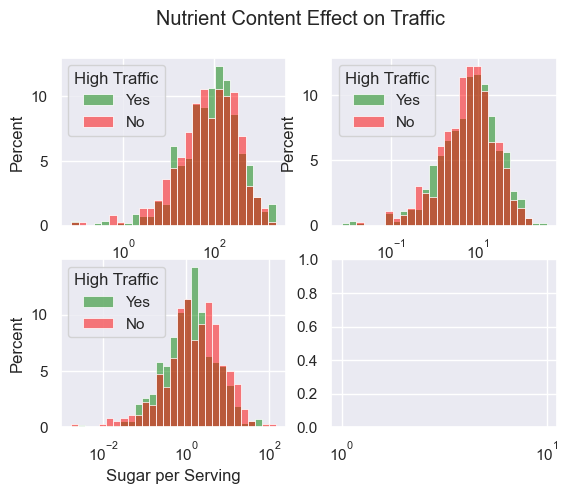

<Figure size 2000x1200 with 0 Axes>

In [15]:
# EXPLORATORY DATA ANALYSIS

# import necessary packages
import matplotlib.pyplot as plt
import seaborn as sns

# prep for visualization
color = ['red', 'green']
fig, ax = plt.subplots(2,2)

plt.figure(figsize=(20, 12))
sns.set(font_scale=1)
fig.suptitle('Nutrient Content Effect on Traffic')

# create nutrient plots
cals = sns.histplot(ax = ax[0,0], data=recipes, x = 'cal_norm', hue = 'high_traffic', stat = 'percent', alpha = 0.5, common_norm=False, log_scale = True, palette = color)
cals.set_xlabel('Calories per Serving')
cals.legend(title = 'High Traffic', labels = ["Yes", "No"])
carbs = sns.histplot(ax = ax[0,1], data=recipes, x = 'carb_norm', hue = 'high_traffic', stat = 'percent', alpha = 0.5, common_norm=False, log_scale = True, palette = color)
carbs.set_xlabel('Carbs per Serving')
carbs.legend(title = 'High Traffic', labels = ["Yes", "No"])
sugar = sns.histplot(ax = ax[1,0], data=recipes, x = 'sugar_norm', hue = 'high_traffic', stat = 'percent', alpha = 0.5, common_norm=False, log_scale = True, palette = color)
sugar.set_xlabel('Sugar per Serving')
sugar.legend(title = 'High Traffic', labels = ["Yes", "No"])
protein = sns.histplot(ax = ax[1,1], data=recipes, x = 'prot_norm', hue = 'high_traffic', stat = 'percent', alpha = 0.5, common_norm=False, log_scale = True, palette = color)
protein.set_xlabel('Protein per Serving')
protein.legend(title = 'High Traffic', labels = ["Yes", "No"])

plt.tight_layout()
plt.show()

# create category plot
cross_tab_prop = pd.crosstab(index=recipes['category'],
                        columns=recipes['high_traffic'],
                            normalize='index')

cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    color=color, 
                    figsize=(10, 6))

plt.legend(title = 'High Traffic', labels = ["No", "Yes"])
plt.xlabel("Category")
plt.ylabel("Proportion of High Traffic")
plt.show()

#create servings plot
cross_tab_prop = pd.crosstab(index=recipes['servings'],
                        columns=recipes['high_traffic'],
                            normalize='index')

cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    color=color, 
                    figsize=(10, 6))

plt.legend(title = 'High Traffic', labels = ["No", "Yes"])
plt.xlabel("Servings")
plt.ylabel("Proportion of High Traffic")
plt.show()

In [ ]:
# BASELINE MODEL

# split data
from sklearn.model_selection import train_test_split

X = recipes.drop(['recipe','high_traffic','calories','carbohydrate','sugar','protein'], axis=1)
y = recipes['high_traffic']

X_train, X_test, y_train, y_test = train_test_split(X,y,stratify = y, test_size = 0.25,random_state=6)

# categorical vs numerical 
cat_columns = X_train.select_dtypes(include=['category']).columns
num_columns = X_train.select_dtypes(exclude=['category']).columns

# create preprocesser
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
numerical_preprocessor = StandardScaler()

preprocessor = ColumnTransformer([("one-hot-encoder", categorical_preprocessor, cat_columns),
                                  ("standard_scaler", numerical_preprocessor, num_columns)])

#create model pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

model = make_pipeline(preprocessor, LogisticRegression())
model.fit(X_train,y_train)
model.score(X_test,y_test)

In [ ]:
# COMPARISON MODELS
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn import model_selection
from sklearn.utils import class_weight
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

X_train_scaled = pd.DataFrame(preprocessor.fit_transform(X_train))
X_test_scaled = pd.DataFrame(preprocessor.transform(X_test))

def run_exps(X_train: pd.DataFrame, y_train: pd.DataFrame, X_test: pd.DataFrame, y_test: pd.DataFrame) -> pd.DataFrame:
    '''
    Lightweight script to test many models and find winners
    :param X_train: training split
    :param y_train: training target vector
    :param X_test: test split
    :param y_test: test target vector
    :return: DataFrame of predictions
    '''
    
    dfs = []
    models = [
          ('LogReg', LogisticRegression()), 
          ('RF', RandomForestClassifier()),
          ('KNN', KNeighborsClassifier()),
          ('SVM', SVC()), 
          ('GNB', GaussianNB()),
          ('XGB', XGBClassifier())
        ]
    results = []
    names = []
    scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']
    target_names = ['High Traffic', 'Low Traffic']
    for name, model in models:
        kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=90210)
        cv_results = model_selection.cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)
        clf = model.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        print(name)
        print(classification_report(y_test, y_pred, target_names=target_names))
        results.append(cv_results)
        names.append(name)
        this_df = pd.DataFrame(cv_results)
        this_df['model'] = name
        dfs.append(this_df)
    final = pd.concat(dfs, ignore_index=True)
    return final

final = run_exps(X_train_scaled,y_train,X_test_scaled,y_test)

final.head()